# Modelos de regresión lineal
## Modelo con datos simulados 
* y = a + b * x
* X : 100 valores distribuidos según N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuido según una N(0,  0.8)



In [1]:
import pandas as pd
import numpy as np


In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x 

In [5]:
y_act = 5 + 1.9 * x - res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }

)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,4.412830,12.599309,13.384377
1,1.535865,9.188936,7.918144
2,0.719579,6.428070,6.367201
3,3.667637,12.091346,11.968510
4,-1.630154,1.579963,1.902708


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual Vs Predicción')

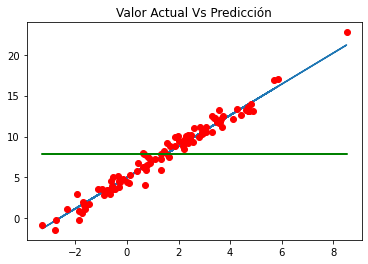

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual Vs Predicción")

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,4.412830,12.599309,13.384377,31.087992,0.616331,22.949781
1,1.535865,9.188936,7.918144,0.011974,1.614913,1.905007
2,0.719579,6.428070,6.367201,2.077967,0.003705,1.906184
3,3.667637,12.091346,11.968510,17.303882,0.015089,18.340919
4,-1.630154,1.579963,1.902708,34.880930,0.104165,38.797371


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

1851.9833732787752

In [16]:
SSD

59.6404713782315

In [17]:
SST

1983.313984894066

In [18]:
SSR+SSD

1911.6238446570067

In [19]:
R2 = SSR/SST

In [20]:
R2

0.9337822389114523

(array([ 5.,  8., 13., 15., 25., 16., 13.,  2.,  2.,  1.]),
 array([-1.7925026 , -1.38635212, -0.98020163, -0.57405114, -0.16790065,
         0.23824984,  0.64440033,  1.05055082,  1.45670131,  1.8628518 ,
         2.26900229]),
 <BarContainer object of 10 artists>)

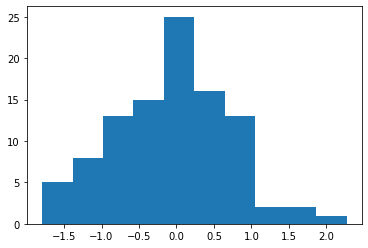

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión

* b= sum((xi - x_m) * (yi-y_m))/sum((xi-x_m)^2)
* a= y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4368884982972225, 7.808716285028534)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2


In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.02485806096348, 1.9374211898585385)

El modelo lineal obtenido por regresión  es: y = 4.963222962297018 + 1.8696337291101064 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,4.412830,12.599309,13.384377,31.087992,0.616331,22.949781,14.256524,8.856228,13.574368
1,1.535865,9.188936,7.918144,0.011974,1.614913,1.905007,0.136610,0.009796,8.000476
2,0.719579,6.428070,6.367201,2.077967,0.003705,1.906184,0.990350,0.514532,6.418986
3,3.667637,12.091346,11.968510,17.303882,0.015089,18.340919,9.553469,4.976238,12.130615
4,-1.630154,1.579963,1.902708,34.880930,0.104165,38.797371,19.103849,9.406747,1.866564


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(1925.0099100292623, 58.30407486480242, 1983.313984894066)

In [31]:
R2 = SSR / SST
R2

0.9706027006773121

Text(0.5, 1.0, 'Valor Actual Vs Predicción')

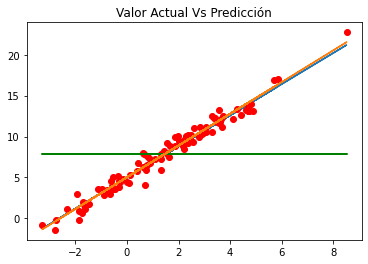

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual Vs Predicción")

## Error estándar de los residuos (RSE)


In [33]:
RSE =  np.sqrt(SSD/(len(data)-2))
RSE

0.7713232392692181

In [34]:
np.mean(data["y_actual"])

7.808716285028534

In [35]:
RSE / np.mean(data["y_actual"])

0.0987772139638442